In [71]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, KFold

In [46]:
with open('./data/titanic.pkl', 'rb') as f:
   X_titanic_train, y_titanic_train, X_titanic_test, y_titanic_test = pickle.load(f)
   
X_titanic = np.concatenate((X_titanic_train, X_titanic_test), axis=0)
y_titanic = np.concatenate((y_titanic_train, y_titanic_test), axis=0)

In [118]:
results_tree = []
results_random_forest = []
results_neural_network = []
results_svm = []

for i in range(30):
   kfold = KFold(n_splits=10, shuffle=True, random_state=i)
   
   decision_tree = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=15, min_samples_split=25, splitter='random')
   scores_tree = cross_val_score(decision_tree, X_titanic, y_titanic, cv=kfold)
   results_tree.append(scores_tree.mean())
   
   random_forest = RandomForestClassifier(n_estimators=40,  criterion='gini', min_samples_leaf=1, min_samples_split=10)
   scores_random_forest = cross_val_score(random_forest, X_titanic, y_titanic, cv=kfold)
   results_random_forest.append(scores_random_forest.mean())
   
   svm = SVC(kernel = 'rbf', C = 100.0, tol=0.001)
   scores_svm = cross_val_score(svm, X_titanic, y_titanic, cv=kfold)
   results_svm.append(scores_svm.mean())

   neural_network = MLPClassifier(max_iter=2000, activation='logistic', hidden_layer_sizes=(8, 8, 8), solver='adam', tol=1e-05)
   scores_neural_network = cross_val_score(neural_network, X_titanic, y_titanic, cv=kfold)
   results_neural_network.append(scores_neural_network.mean())
   

In [119]:
print(len(results_tree), len(results_neural_network), len(results_svm), len(results_random_forest))

30 30 30 30


In [120]:
results = pd.DataFrame({'Tree': results_tree, 'Neural Network': results_neural_network, 'SVM': results_svm, 'Random Forest': results_random_forest})

results

,Tree,Neural Network,SVM,Random Forest
0,0.847240,0.857921,0.852578,0.866324
1,0.862501,0.853335,0.854880,0.864809
2,0.863235,0.867816,0.852537,0.865531
3,0.859442,0.854856,0.845708,0.867052
4,0.860963,0.863253,0.848726,0.871650
5,0.868579,0.854815,0.851732,0.870846
6,0.857898,0.864774,0.852548,0.872413
7,0.847933,0.863200,0.854063,0.866254
8,0.857087,0.861691,0.851045,0.863993
9,0.857951,0.855655,0.852601,0.865584


In [121]:
results.describe()

,Tree,Neural Network,SVM,Random Forest
count,30.000000,30.000000,30.000000,30.000000
mean,0.858572,0.860557,0.852410,0.867152
std,0.005425,0.004213,0.002040,0.003257
min,0.847240,0.853335,0.845708,0.861691
25%,0.855807,0.856585,0.851217,0.864990
50%,0.859055,0.860593,0.852581,0.866694
75%,0.863052,0.864580,0.854062,0.870283
max,0.868579,0.867851,0.855625,0.872431


In [122]:
print(results.var())
print((results.std() / results.mean()) * 100)


Tree              0.000029
Neural Network    0.000018
SVM               0.000004
Random Forest     0.000011
dtype: float64
Tree              0.631889
Neural Network    0.489537
SVM               0.239326
Random Forest     0.375614
dtype: float64


In [123]:
alpha = 0.05

In [124]:
from scipy.stats import shapiro

In [125]:
shapiro(results_tree), shapiro(results_neural_network), shapiro(results_svm), shapiro(results_random_forest)

(ShapiroResult(statistic=0.9670931100845337, pvalue=0.46300074458122253),
 ShapiroResult(statistic=0.9440909028053284, pvalue=0.11724772304296494),
 ShapiroResult(statistic=0.9079995155334473, pvalue=0.01325297262519598),
 ShapiroResult(statistic=0.937567412853241, pvalue=0.07823401689529419))

In [126]:
import seaborn as sns

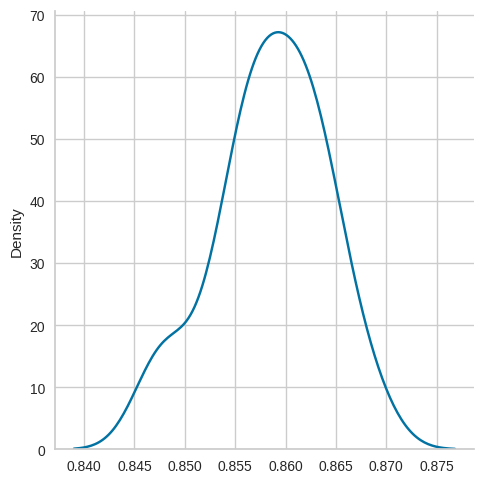

In [127]:
sns.displot(results_tree, kind='kde')

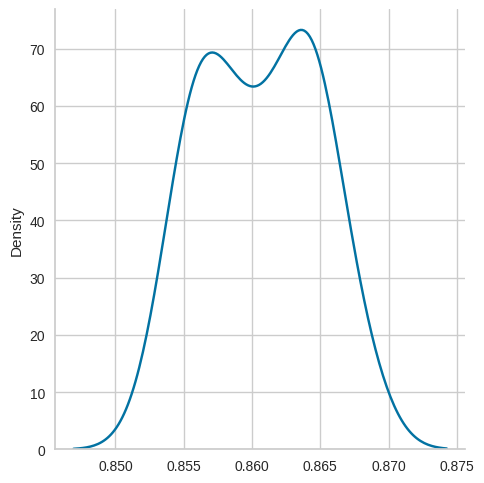

In [128]:
sns.displot(results_neural_network, kind='kde')

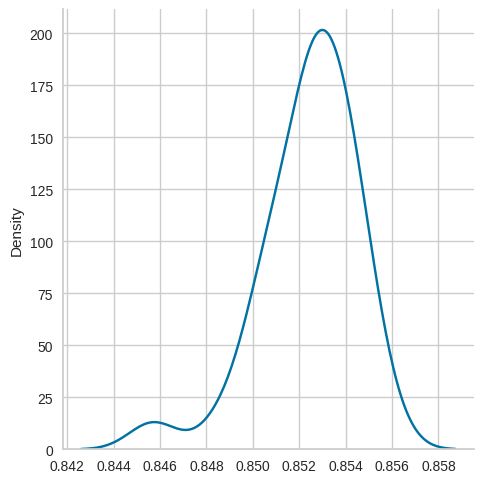

In [129]:
sns.displot(results_svm, kind='kde')

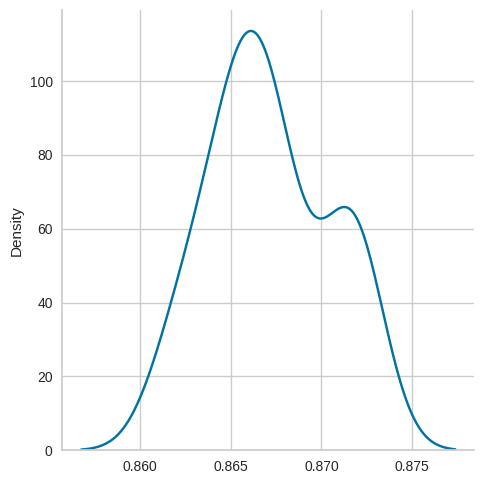

In [142]:
sns.displot(results_random_forest, kind='kde')

# Teste de Hípotese

In [131]:
from scipy.stats import f_oneway

In [132]:
_, p = f_oneway(results_tree, results_neural_network, results_svm, results_random_forest)
p

3.025850636318551e-26

In [133]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [134]:
a_tree = []
a_random_forest = []
a_svm = []
a_neural_network = []
for i in range(0,30):
   a_tree.append('tree')
   a_random_forest.append('random_forest')
   a_svm.append('svm')
   a_tree.append('tree')
   

In [135]:
results_agm = {
   'accuracy': np.concatenate([results_tree, results_neural_network, results_svm, results_random_forest]),
   'agm': ['tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','neural_network','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest']
}

In [136]:
results_df = pd.DataFrame(results_agm)
results_df

,accuracy,agm
0,0.847240,tree
1,0.862501,tree
2,0.863235,tree
3,0.859442,tree
4,0.860963,tree
...,...,...
115,0.867827,random_forest
116,0.871674,random_forest
117,0.867093,random_forest
118,0.864011,random_forest


In [137]:
results.mean()

Tree              0.858572
Neural Network    0.860557
SVM               0.852410
Random Forest     0.867152
dtype: float64

In [138]:
from statsmodels.stats.multicomp import MultiComparison

In [139]:
comp_agm = MultiComparison(results_df['accuracy'], results_df['agm'])

In [140]:
test_tukey = comp_agm.tukeyhsd()
print(test_tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2    meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------
neural_network random_forest   0.0066    0.0  0.0039  0.0092   True
neural_network           svm  -0.0081    0.0 -0.0108 -0.0055   True
neural_network          tree   -0.002 0.2118 -0.0046  0.0007  False
 random_forest           svm  -0.0147    0.0 -0.0174 -0.0121   True
 random_forest          tree  -0.0086    0.0 -0.0112 -0.0059   True
           svm          tree   0.0062    0.0  0.0035  0.0088   True
-------------------------------------------------------------------


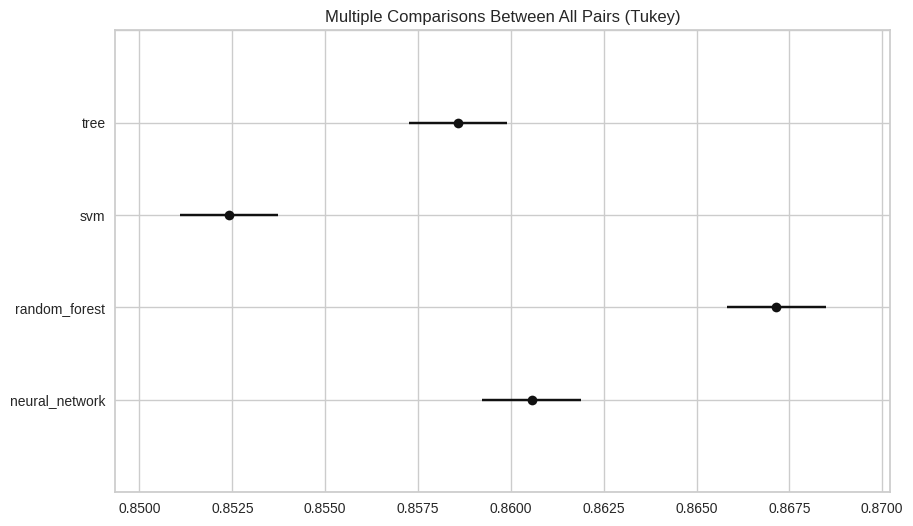

In [141]:
test_tukey.plot_simultaneous();